<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/25_2_%D0%93%D0%B8%D0%BF%D0%B5%D1%80%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D1%8B_%D0%B8_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Первое знакомство с AutoML](https://colab.research.google.com/drive/1bCWyzlp1-tcvt7TE60m4hFnRd5AWscWY)
2. Гиперпараметры и оптимизация моделей
3. [AutoML в Keras](https://colab.research.google.com/drive/1V7mfY8da0S-FbWxhQbchJM38JSJBmtoZ)
4. [Домашняя работа](https://colab.research.google.com/drive/1ti0hKew4nglRSYPSpfxQx19cGfVxU_K4)

Как вы уже, наверное, догодались в этой части урока мы поговорим про гиперпараметры, узнаем, что такое гиперпараметрический поиск, как с помощью него оптимизировать модели и какая роль во всем этом у AutoML.

### Важность гиперпараметров

При создании моделей машинного обучения существует одна важная составляющая, которая часто остается за кадром, но имеет решающее значение для достижения высокой производительности и точности — это **гиперпараметры**.

Как архитекторы строят основу для здания, так и выбор гиперпараметров определяет фундамент для моделей машинного обучения.

**Гиперпараметры** — это параметры, которые настраиваются до начала процесса обучения и определяют как саму структуру модели, так и способ её обучения. Их правильный выбор может значительно повлиять на результаты обучения, тогда как неправильно подобранные значения гиперпараметров приведут к недообученным или переобученным моделям, а иногда вообще к неспособности модели обучаться (расхождение градиента).

Способность модели к обобщению данных — ключевой аспект, определяющий её ценность в реальных задачах. Гиперпараметры влияют на эту способность, играя роль "регуляторов" модели. Правильно подобранные гиперпараметры помогают сбалансировать между "подгонкой" модели под обучающие данные (переобучение) и слишком обобщенным представлением, которое может упустить важные закономерности (недообучение).

### Отличие гиперпараметров от параметров модели

**Гиперпараметры** и **параметры** — это два ключевых аспекта, которые формируют модель машинного обучения. Они играют разные роли в процессе обучения и влияют на поведение и производительность модели.

**Гиперпараметры** — это настройки модели, которые определяют её общую структуру и способ обучения. Эти параметры устанавливаются до начала процесса обучения и не изменяются в процессе обучения модели. Гиперпараметры оказывают влияние на то, как модель будет обучаться, какие признаки будут учитываться, и какие ограничения будут наложены на процесс обучения. Примерами гиперпараметров могут быть количество слоев и нейронов в нейронной сети, скорость обучения, шаг градиентного спуска, коэффициент регуляризации и т.д.

**Параметры модели** - являются внутренними весами или коэффициентами, которые модель обучает в процессе обучения на основе обучающих данных. Эти параметры изменяются в процессе обучения с целью минимизации функции потерь и достижения наилучшего соответствия между прогнозами модели и реальными значениями целевой переменной. В случае нейронных сетей, параметры включают веса между нейронами в разных слоях.

Различие между гиперпараметрами и параметрами модели заключается в том, что гиперпараметры задаются вручную до начала обучения и определяют характеристики всего процесса обучения, в то время как параметры модели вычисляются в процессе обучения на основе данных и оптимизируются для достижения наилучшей производительности.

Понимание разницы между гиперпараметрами и параметрами модели является ключевым для правильного настройки моделей машинного обучения и достижения оптимальных результатов.

Каждый алгоритм машинного обучения имеет свои особенности и требует настройки определенных параметров, чтобы обеспечить оптимальное обучение и предсказания.

Приведем **пример гиперпараметров для нейронных сетей:**

1. **Количество слоев и нейронов в каждом слое**. Определяет архитектуру нейронной сети и её способность обобщать данные.

2. **Скорость обучения (learning rate)**. Управляет размером шага градиентного спуска при обновлении весов нейронов.

3. **Функции активации**. Определяют, как нейроны будут "возбуждаться" при передаче сигнала.

## Гиперпараметрический поиск


### Методы гиперпараметрического поиска

Выбор подходящих гиперпараметров — это чрезвычайно важный этап в создании моделей машинного обучения. Неправильный выбор гиперпараметров может привести к неудовлетворительным результатам, долгим сессиям обучения и переобучению.

Среди наиболее распространенных **стратегий и методов для эффективного гиперпараметрического поиска и оптимизации** обычно выделяют:

1. **Решетчатый поиск** (Grid Search).
Этот метод предполагает задание наборов значений для каждого гиперпараметра, которые затем "перебираются" систематически для нахождения наилучшей комбинации. Для каждой комбинации гиперпараметров производится обучение модели и оценка её производительности на валидационных данных. Преимущество решетчатого подхода в том, что он гарантирует полный перебор всех заданных комбинаций гиперпараметров, что может помочь найти наилучшие значения. Однако это может быть очень ресурсозатратным, особенно при большом числе гиперпараметров и значений.
2. **Случайный поиск** (Random Search).
Вместо того чтобы перебирать все комбинации, случайный поиск выбирает случайные наборы значений для каждого гиперпараметра. Этот метод может быть более эффективным по времени, так как он обычно требует меньше итераций, чтобы найти хорошие значения. Также случайный поиск может быть эффективнее в поиске оптимальных гиперпараметров, когда ресурсы ограничены. Однако есть вероятность упустить некоторые комбинации, которые могли бы быть лучшими.
3. **Байесовская оптимизация** или оптимизация с использованием байесовских методов (Bayesian Optimization). Это метод, который сочетает вероятностные модели с методами оптимизации для эффективного поиска оптимальных гиперпараметров. Он основан на идее моделирования функции оценки производительности модели и использования этой модели для выбора следующей точки для оценки. Байесовская оптимизация часто требует меньше итераций, чем решетчатый или случайный поиск, чтобы достичь лучших результатов.
4. **Применение алгоритмов глубокого обучения**.
Глубокие нейронные сети могут быть использованы для оптимизации гиперпараметров. Например, можно использовать рекуррентные нейронные сети или сверточные нейронные сети для предсказания производительности модели с разными гиперпараметрами. Этот метод требует большого объема вычислительных ресурсов, но он может быть эффективным для сложных моделей.



Выбор метода зависит от доступных ресурсов, сложности модели и поставленной задачи. Опыт и эксперименты помогут найти наилучший способ настройки гиперпараметров для конкретной задачи.

### Рекомендации по гиперпараметрическому поиску

**Определение диапазонов гиперпараметров на основе предварительного анализа**

Прежде чем начать гиперпараметрический поиск, важно провести предварительный анализ данных и задачи. Изучите характеристики ваших данных, исследуйте различные аспекты задачи, такие как количество признаков, баланс классов и тип задачи (например, классификация или регрессия). Это поможет вам определить диапазоны значений для гиперпараметров, которые имеют смысл для вашей задачи.

Например, мы хотим подобрать гиперпараметры для конкретного слоя нашей полносвязной модели нейронной сети, тогда мы можем задать следующие параметры для поиска (число нейронов, функция активации и функция оптимизации):

```python

# Определение сетки параметров для поиска
param_grid = {
    'neurons': [32, 64, 128],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop']
}
```

**Выбор критерия оценки для сравнения моделей с разными гиперпараметрами**

Оценка производительности моделей с разными гиперпараметрами является сложной задачей. Выбор подходящего критерия оценки зависит от задачи и данных. Для задач классификации, например, можно использовать различные метрики, а нетолько точность (accuracy). В задачах классификации успешно применяются следующие метрики: полнота (recall), прецизионная точность (precision) и F1-мера.

Выбор критерия оценки также зависит от бизнес-целей задачи. Если вы сталкиваетесь с задачей детекции редких событий, то может быть важно сосредоточиться на максимизации полноты, чтобы убедиться, что вы не упускаете важные случаи.

**Используйте кросс-валидацию**

Кросс-валидация — важный инструмент для оценки производительности моделей с разными гиперпараметрами. Она позволяет оценить, насколько хорошо модель "работает" на новых данных. Если вы решаете задачу с помощью классического машинного обучения (ML), то кросс-валидация для вас будет основным инструментом оценки и позволит избежать переобучения.


**Оценка стабильности производительности модели**

Важно обращать внимание на стабильность производительности модели. Если производительность модели сильно изменяется при изменении небольших гиперпараметров, это может указывать на недостаточную стабильность.

**Когда могут понадобиться эти рекомендации?**

Для поиска гиперпараметров существует большое количество разнообразных библиотек и фреймворков, где можно в "полуавтоматическом режиме" производить настройки гиперпараметров. Например, вы решите воспользоваться методами библиотеки `Scikit-learn`:


1. Метод `GridSearchCV` позволяет провести решетчатый поиск по заданным наборам гиперпараметров. Этот метод применяет кросс-валидацию для каждой комбинации гиперпараметров и выбирает наилучшие.
2. Метод `RandomizedSearchCV` позволяет провести случайный поиск по заданным наборам гиперпараметров. Этот метод применяет кросс-валидацию для каждой комбинации гиперпараметров и выбирает наилучшие.

Нам же более интересны автоматические методы и пора приступить к их изучению! Но знать об альтернативных методах необходимо и важно, возможно именно вам попадется задача, которая окажется AutoML не по зубам!


### Применение методов AutoML для автоматической оптимизации гиперпараметров

В поиске оптимальных гиперпараметров для моделей машинного обучения часто требуется значительное количество времени и ресурсов. Чтобы облегчить этот процесс и ускорить достижение лучших результатов, были разработаны методы автоматической оптимизации гиперпараметров.

AutoML — это подход, который стремится автоматизировать различные этапы создания моделей машинного обучения, включая выбор алгоритмов, настройку гиперпараметров и даже предобработку данных. Это особенно полезно, когда у нас ограничены временные и вычислительные ресурсы, а также когда необходимо получить наилучший результат с минимальной затратой усилий.

Одной из наиболее важных задач в рамках AutoML является автоматическая оптимизация гиперпараметров. Это позволяет облегчить процесс подбора оптимальных значений, освободив пользователя от необходимости вручную изменять их и проводить множество экспериментов.

### Auto-sklearn: автоматический выбор алгоритма и оптимизация гиперпараметров

`Auto-sklearn` — это библиотека, разработанная на основе `scikit-learn`, которая предоставляет автоматическую оптимизацию гиперпараметров и выбор алгоритмов. Она использует байесовскую оптимизацию для настройки гиперпараметров и автоматически выбирает лучший алгоритм для данной задачи. Основной класс задач, с которыми работает библиотека - это задачи классификации и регрессии.

Прежде чем работать с библиотекой, ее необходимо установить. Если вы устанавливаете `auto-sklearn` на свой компьютер, то скорее всего вам достаточно будет воспользоваться одной командой:

```
pip install auto-sklearn
```

Однако, в Google Colab, это похоже на настоящий "КВЕСТ". Чтобы было понятней, мы ниже все команды установки отметили цифрами, чтобы не запутаться:

1. Удалите все уязвимые пакеты. Это те пакеты, чьи зависимости "мешают" нам для установки `auto-sklearn`.
2. Установите определенные версии пакетов (версии ниже, чем в колабе были ранее, так называемый downgrade) из удаленных. После установки пакетов колаб предложит перезапустить сессию. Необходимо согласиться и только после запускать следующую ячейку.
3. Установите более старую версию scikit-learn без учета ее зависимостей (запуск с параметром `--no-build-isolation`).
4. Финальная установка auto-sklearn.

Гугл часто обновляет свои сервера, изменяются версии библиотек и их зависимости. Поэтому пробуйте сразу выполнять пункт 4, а вдруг сразу запустится. А если нет, то тогда проходите процедуру пошагам.

In [ ]:
# 1. удалите все уязвимые пакеты
!pip uninstall -y Cython scipy pyparsing scikit_learn imbalanced-learn mlxtend yellowbrick

# 2. устанавливаем фиксированные версии пакетов
!pip install Cython==0.29.36 scipy==1.9 pyparsing==2.4

Found existing installation: Cython 3.0.10
Uninstalling Cython-3.0.10:
  Successfully uninstalled Cython-3.0.10
Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
Found existing installation: pyparsing 3.1.2
Uninstalling pyparsing-3.1.2:
  Successfully uninstalled pyparsing-3.1.2
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
Found existing installation: mlxtend 0.22.0
Uninstalling mlxtend-0.22.0:
  Successfully uninstalled mlxtend-0.22.0
Found existing installation: yellowbrick 1.5
Uninstalling yellowbrick-1.5:
  Successfully uninstalled yellowbrick-1.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 14.1 MB/s eta 0:00:00


In [ ]:
# 3. установите более старую версию scikit-learn без учета ее зависимостей
!pip install scikit-learn==0.24.2 --no-build-isolation

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl size=22237869 sha256=98f31bad140455a65bf31a287e6d4c64cab116406145daf103531494959aa57e
  Stored in directory: /root/.cache/pip/wheels/13/a4/68/4e78865652fa14db4a162b491e5138565f97646f9e1f2ab8cc
Successfully built scikit-learn
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.2.0 requires scikit-learn>=1.2.2, but you have scikit-learn 0.24.2 which is incompatible.


In [ ]:
# 4. финальная установка auto-sklearn
!pip install auto-sklearn

  Using cached auto-sklearn-0.15.0.tar.gz (6.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 5.8 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641936 sha256=f6732e3f2f644a2468fd7469d030a779b7c159c6e4d41533f3346cebadbf0e50
  Stored in directory: /root/.cache/pip/wheels/4d/0a/f9/8c1a06bcc36bc16b467b044b5bb03a90f92a5c5e6cd443414b
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7026 sha256=7d43dfbd50

Выполним простой пример ниже. Как вы видите, код очень простой и лаконичный. Мы взяли предустановленный датасет `digits` из библиотеки `sklearn`.

In [ ]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets

# Загрузка данных, предустановленный датасет digits
X, y = sklearn.datasets.load_digits(return_X_y=True) # return_X_y - нас интересуют как данные, так и метки классов

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

# Создание объекта Auto-sklearn и выполнение оптимизации
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=3600)  # time_left_for_this_task - ограничение времени поиска решения в секундах
automl.fit(X_train, y_train) # обучение

# Получение предсказаний на тестовой выборке
y_pred = automl.predict(X_test)

# Оценка производительности
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9911111111111112


Мы видим, что точность модели соствила 99%. Это очень круто!

Получим модели, найденные с помощью auto-sklearn:

In [ ]:
automl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
139,1,0.04,lda,0.008989,4.635552
146,24,0.06,lda,0.008989,4.535182
148,23,0.06,lda,0.008989,4.565134
157,22,0.02,lda,0.008989,4.909153
167,21,0.02,lda,0.008989,5.193954
176,20,0.04,lda,0.008989,4.676269
177,19,0.08,lda,0.008989,4.619011
184,18,0.06,lda,0.008989,4.914429
186,17,0.04,lda,0.008989,4.898051


На выходи мы получили "таблицу лидеров" для всех оцененных моделей. Содержит обзор всех моделей, прошедших обучение в процессе поиска, а также
различные статистические данные об их обучении.

Доступны следующие статистические данные:

* **model_id** - идентификатор модели в библиотеке.

* **rank** - ранг модели, основанный на ее "cost".

* **ensemble_weight** - вес, присвоенный модели в ансамбле моделей.

* **type** - тип используемого классификатора/регрессора.

* **cost** - потери модели на валидационной выборке.

* **duration** - период времени, на котором модель оптимизировалась.

Более детально изучить модели созданные с помощью auto-sklearn можно в формате JSON:

In [ ]:
from pprint import pprint # удобная библиотека для печати с отступами (indent - число пробелов)
pprint(automl.show_models(), indent=4)

{   139: {   'balancing': Balancing(random_state=1),
             'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7bb7ed489360>,
             'cost': 0.008988764044943864,
             'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7bb7ed489f00>,
             'ensemble_weight': 0.04,
             'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7bb7ed488b80>,
             'model_id': 139,
             'rank': 1,
             'sklearn_classifier': LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',
                           tol=0.08913295521534927)},
    146: {   'balancing': Balancing(random_state=1),
             'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7bb7ed4282e0>,
             'cost': 0.008988764044943864,
             'data_preprocessor': <autosklearn.p

Мы знаем, что точность классификации модели составила 99%. Но мы сохранили интригу о датасете. Давайте выведем его на экран:



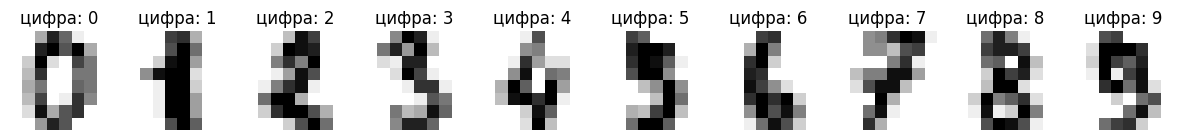

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# загрузим датасет c параметром return_X_y=False
digits = sklearn.datasets.load_digits(return_X_y=False)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3)) # настройки графика

# zip из 3-х списков делает новый список, состоящий из кортежей по 3 элемента
# zip(axes, digits.images, digits.target) -> [(axes[0], digits.images[0], digits.target[0]), ...]
for ax, image, label in zip(axes, digits.images, digits.target):
    # отключаем оси
    ax.set_axis_off()
    # выводим изображения в градиенте серого
    ax.imshow(image, cmap=plt.cm.gray_r)
    # устанавливаем заголовки для графиков
    ax.set_title("цифра: %i" % label)

Набор данных digits состоит из изображений цифр размером 8x8 пикселей. Атрибут images набора данных хранит массивы значений в оттенках серого размером 8x8 пикселей для каждого изображения. Мы использовали эти массивы для визуализации первых 10 изображений. Атрибут target набора данных хранит цифру, которую представляет каждое изображение, и это включено в название графиков.

Таким образом, мы видим, что на датасете, отдаленно напоминающим, знакомый нам MNIST (рукописные цифры), можно получить точность в 99% на валидационной (проверочной) выборке с помощью классического машинного обучения (ML), благодаря AutoML.

В [следующей части урока](https://colab.research.google.com/drive/1V7mfY8da0S-FbWxhQbchJM38JSJBmtoZ) мы рассмотрим библиотеки AutoML для глубокого обучения (DL), разработанные специально для фреймворка Keras.